### This Notebook is For the Perceptron Algorithm Basic Learning Version -1

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [20]:
# Now we define the positive an negative classes
positive_points = np.array([(-2, 3), (0, 1), (2, -1)])

positive_new_points = [
    (-2 + np.random.uniform(-0.5, 0.5), 3 + np.random.uniform(-0.5, 0.5)) for _ in range(10)
] + [
    (0 + np.random.uniform(-0.5, 0.5), 1 + np.random.uniform(-0.5, 0.5)) for _ in range(10)
] + [
    (2 + np.random.uniform(-0.5, 0.5), -1 + np.random.uniform(-0.5, 0.5)) for _ in range(10)
]

positive_points = np.vstack([positive_points, positive_new_points])


In [21]:
negative_points = np.array([(-2, 1), (0, -1), (2, -3)])

negative_new_points = [
    (-2 + np.random.uniform(-0.5, 0.5), 1 + np.random.uniform(-0.5, 0.5)) for _ in range(10)
] + [
    (0 + np.random.uniform(-0.5, 0.5), -1 + np.random.uniform(-0.5, 0.5)) for _ in range(10)
] + [
    (2 + np.random.uniform(-0.5, 0.5), -3 + np.random.uniform(-0.5, 0.5)) for _ in range(10)
]

negative_points = np.vstack([negative_points, negative_new_points])

In [22]:
positive_points

array([[-2.        ,  3.        ],
       [ 0.        ,  1.        ],
       [ 2.        , -1.        ],
       [-2.17954555,  3.02556965],
       [-1.90592773,  2.5037676 ],
       [-2.3010534 ,  3.34373426],
       [-2.056231  ,  2.62213509],
       [-1.71561055,  3.0769003 ],
       [-2.02766392,  2.52359647],
       [-1.74149151,  3.40632357],
       [-2.14862732,  2.99772973],
       [-2.49817645,  3.09104775],
       [-2.48142074,  2.61903846],
       [-0.43771374,  1.08822603],
       [ 0.44935159,  0.99578149],
       [ 0.22927441,  0.67974784],
       [ 0.42372538,  1.20993438],
       [-0.31877801,  1.32485   ],
       [ 0.33633325,  0.87722317],
       [-0.24150406,  1.06741737],
       [ 0.49247957,  0.81556514],
       [ 0.29365099,  1.12759307],
       [-0.49958591,  0.95890812],
       [ 1.81154209, -1.43825422],
       [ 1.6678893 , -1.17065054],
       [ 2.41067502, -0.74709911],
       [ 1.76724086, -0.53952612],
       [ 2.20896168, -0.739629  ],
       [ 2.4864435 ,

In [23]:
negative_points

array([[-2.        ,  1.        ],
       [ 0.        , -1.        ],
       [ 2.        , -3.        ],
       [-2.18109754,  0.51021826],
       [-2.48011021,  0.8588976 ],
       [-1.86797486,  0.79432407],
       [-2.06644483,  0.91915874],
       [-1.94458104,  0.86471516],
       [-2.18805971,  0.83578786],
       [-2.33334997,  0.59912399],
       [-1.96012493,  1.34419224],
       [-1.86014473,  0.54562584],
       [-1.55260262,  1.31010066],
       [ 0.31089498, -0.97585258],
       [ 0.3545557 , -0.6604325 ],
       [-0.01681949, -0.79852057],
       [ 0.05802345, -0.93334624],
       [-0.2990547 , -1.26925592],
       [-0.04811329, -0.91530872],
       [ 0.44897648, -1.48815357],
       [-0.43939145, -1.15394208],
       [-0.10719332, -0.81693266],
       [-0.39014285, -0.64803877],
       [ 2.48076114, -3.13438432],
       [ 1.90707589, -3.16776697],
       [ 2.35232539, -2.50143575],
       [ 2.30475356, -2.57279147],
       [ 2.37849461, -2.89484591],
       [ 1.95233716,

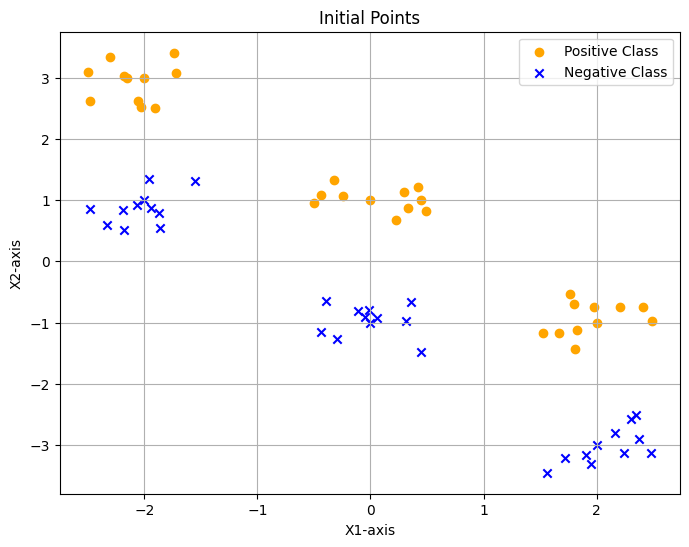

In [24]:
# Plot initial points 
plt.figure(figsize=(8, 6))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='orange', label='Positive Class', marker='o')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='blue', label='Negative Class', marker='x')
plt.title('Initial Points')
plt.xlabel('X1-axis')
plt.ylabel('X2-axis')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Combbine all points and labbels

X = np.vstack([positive_points, negative_points])
y = np.array([1] * len(positive_points) + [-1] * len(negative_points))

In [26]:
X

array([[-2.        ,  3.        ],
       [ 0.        ,  1.        ],
       [ 2.        , -1.        ],
       [-2.17954555,  3.02556965],
       [-1.90592773,  2.5037676 ],
       [-2.3010534 ,  3.34373426],
       [-2.056231  ,  2.62213509],
       [-1.71561055,  3.0769003 ],
       [-2.02766392,  2.52359647],
       [-1.74149151,  3.40632357],
       [-2.14862732,  2.99772973],
       [-2.49817645,  3.09104775],
       [-2.48142074,  2.61903846],
       [-0.43771374,  1.08822603],
       [ 0.44935159,  0.99578149],
       [ 0.22927441,  0.67974784],
       [ 0.42372538,  1.20993438],
       [-0.31877801,  1.32485   ],
       [ 0.33633325,  0.87722317],
       [-0.24150406,  1.06741737],
       [ 0.49247957,  0.81556514],
       [ 0.29365099,  1.12759307],
       [-0.49958591,  0.95890812],
       [ 1.81154209, -1.43825422],
       [ 1.6678893 , -1.17065054],
       [ 2.41067502, -0.74709911],
       [ 1.76724086, -0.53952612],
       [ 2.20896168, -0.739629  ],
       [ 2.4864435 ,

In [27]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
# Perceptron algorithm
def perceptron(X,y,steps =10):
    theta = np.zeros(X.shape[1])
    theta_0 = 0
    for i in range(steps):
        for j,xi in enumerate(X):
            if y[j] * (np.dot(theta, xi) + theta_0) <= 0:
                theta += y[j] * xi
                theta_0 += y[j]
                break
        plot_decision_boundary( theta, theta_0, i+1)
    return theta, theta_0

In [32]:
def plot_decision_boundary(theta, theta_0, itaration):
    plt.figure(figsize=(8,6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='orange', label='Positive Class', marker='o')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='blue', label='Negative Class', marker='x')

    # Plot decision boundary
    x_values = np.linspace(-5, 5, 100)
    # Check for theta[1] to avoid division by zero in case of vertical line

    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta_0) / theta[1]
        plt.plot(x_values,y_values, label = f'Iteration {itaration}')
    else:
        #Plot vertical line
        x_val = -theta_0 / theta[0]
        plt.axvline(x=x_val, label = f'Iteration {itaration}')
    
    plt.xlim(-3,3)
    plt.ylim(-4,4)
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.title(f'Decission Boundary at Iteration {itaration}')
    plt.legend()
    plt.grid(True)
    plt.show()

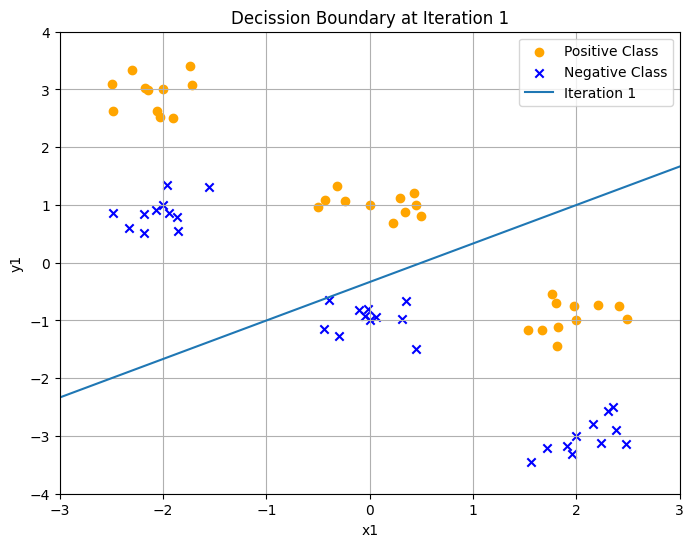

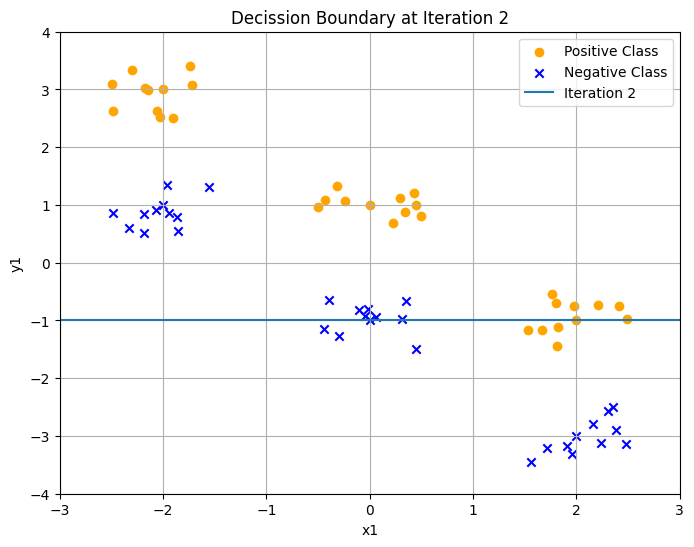

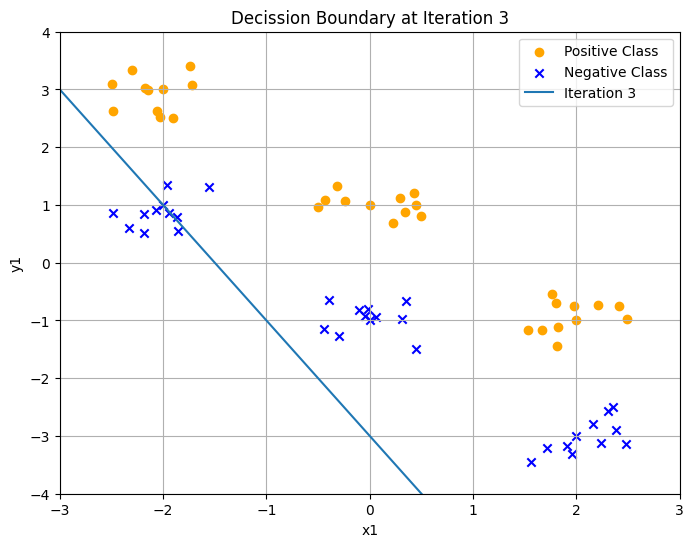

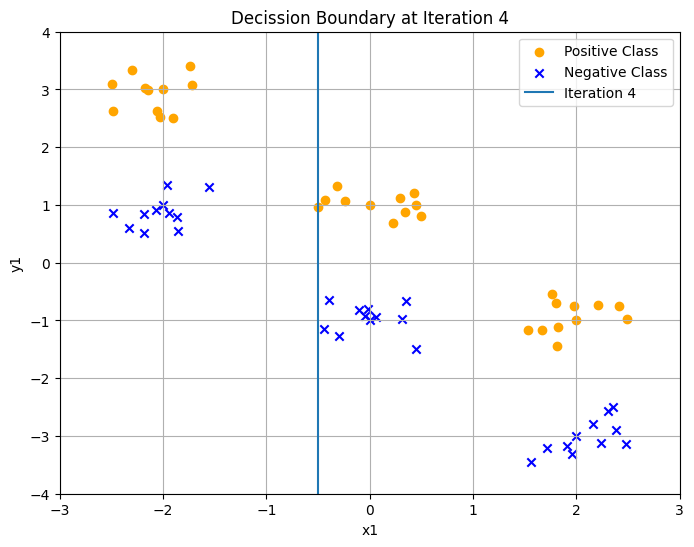

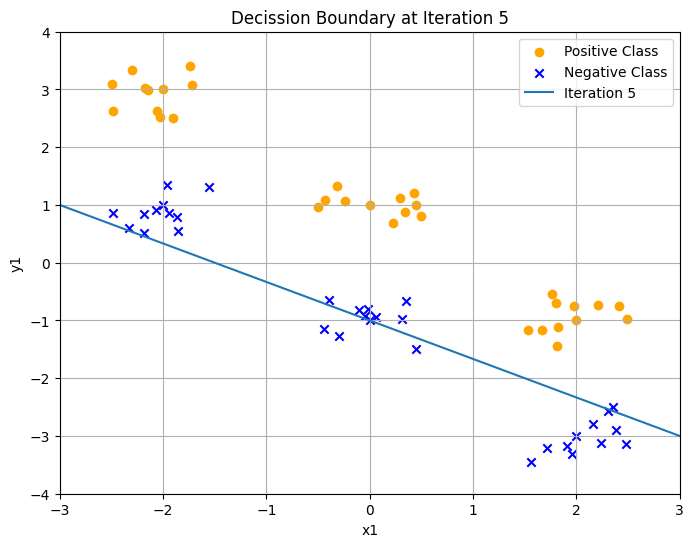

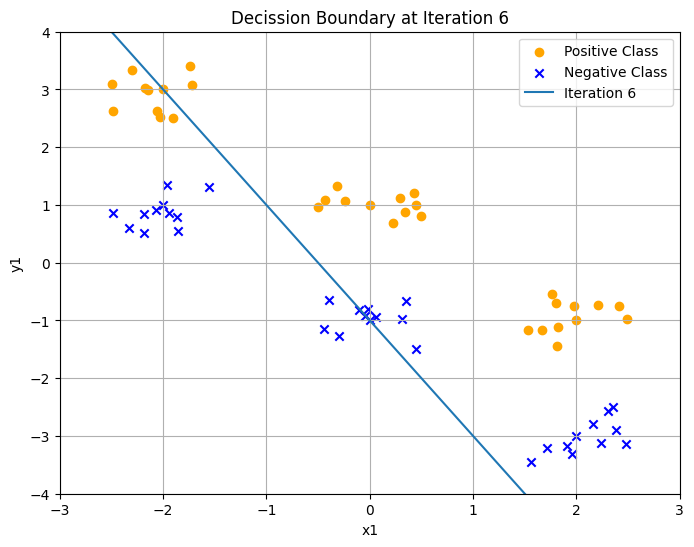

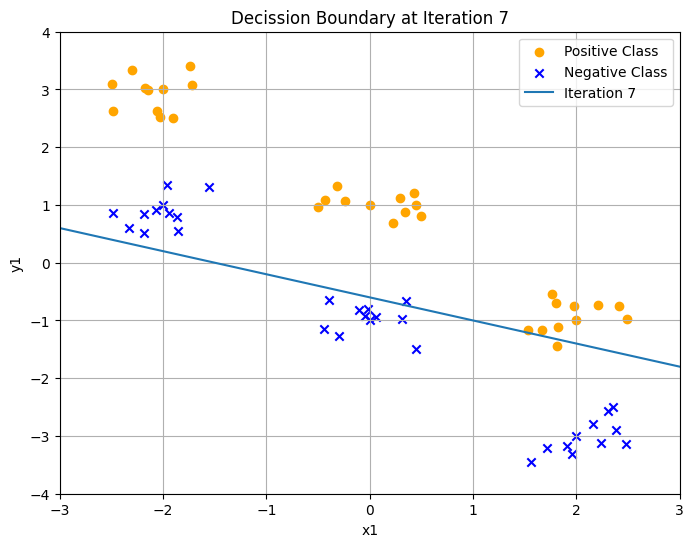

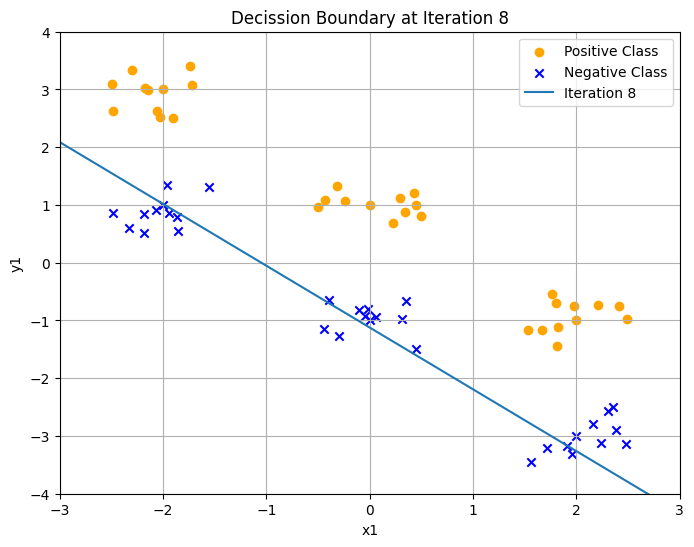

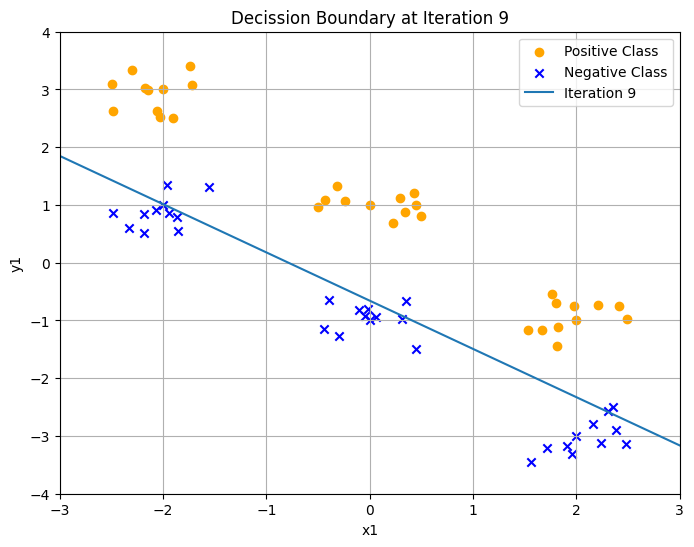

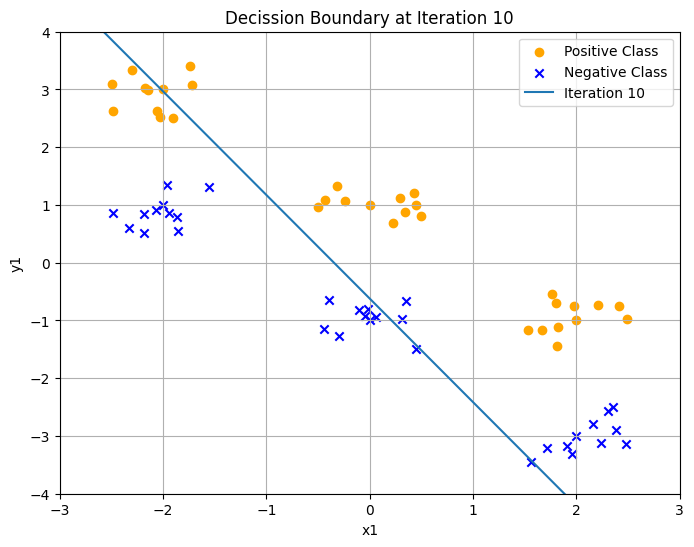

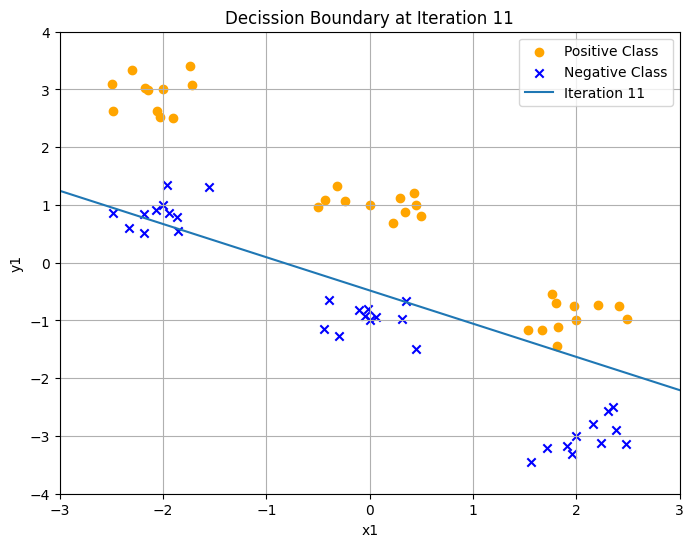

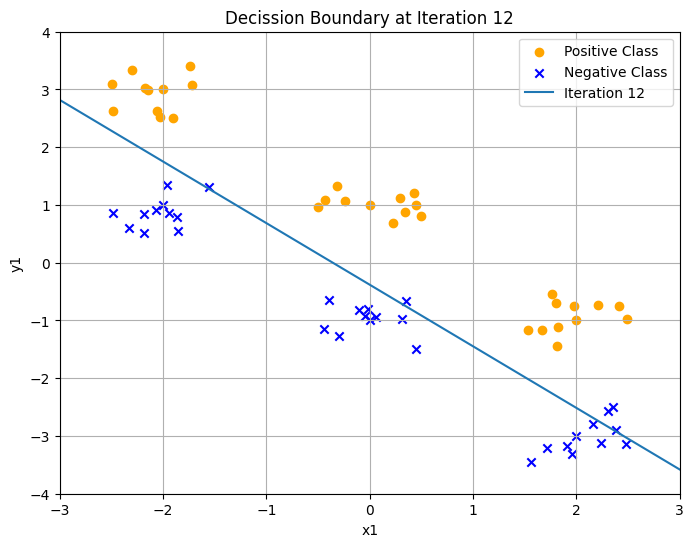

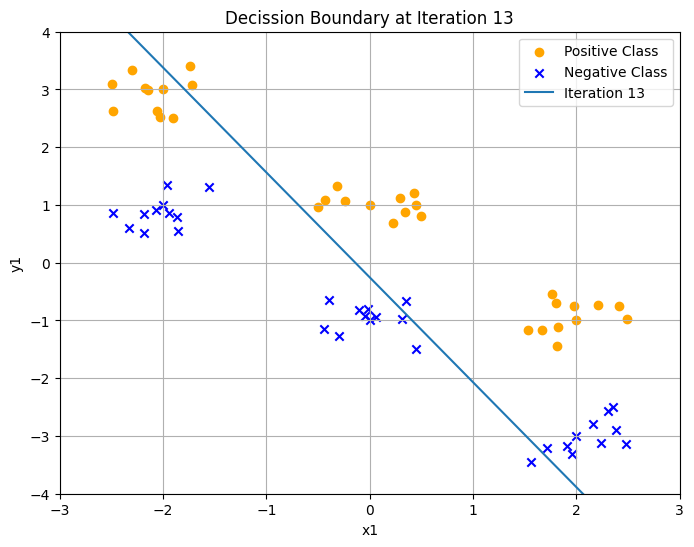

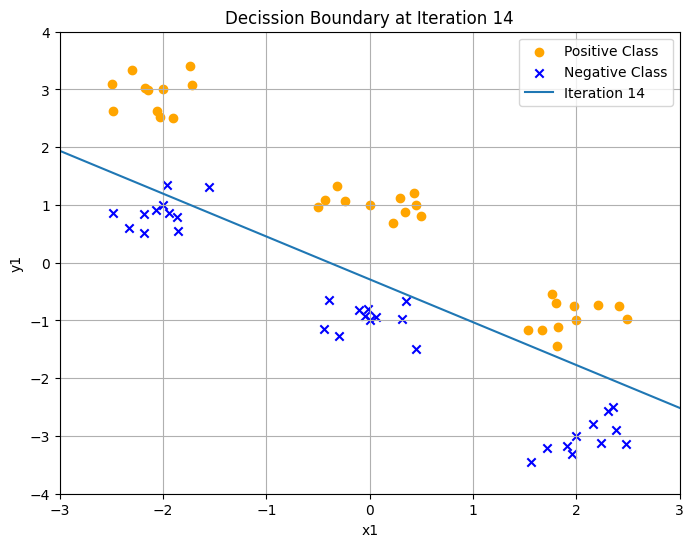

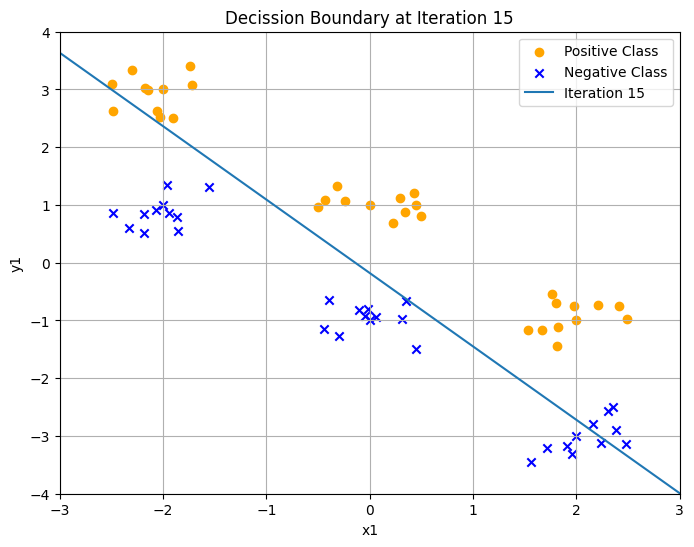

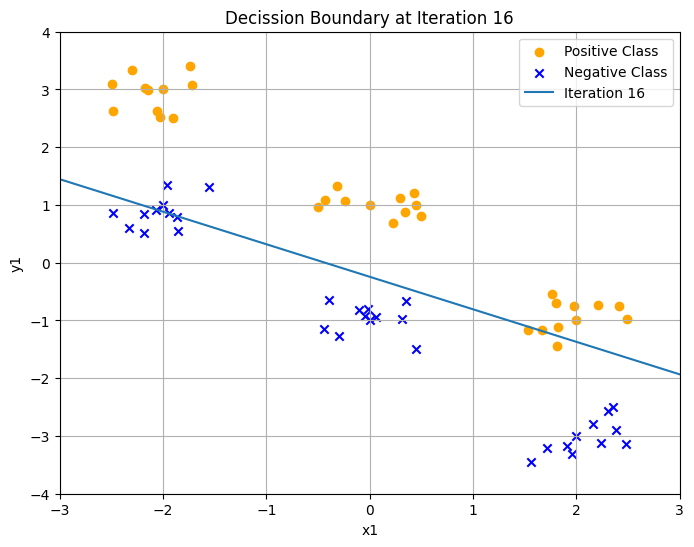

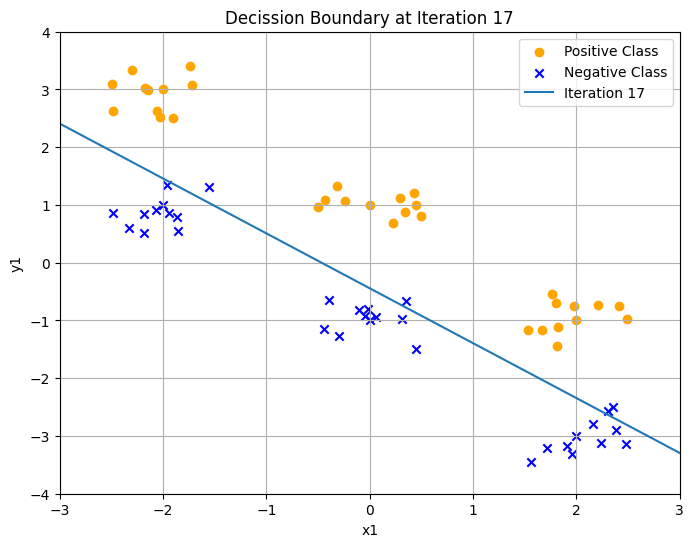

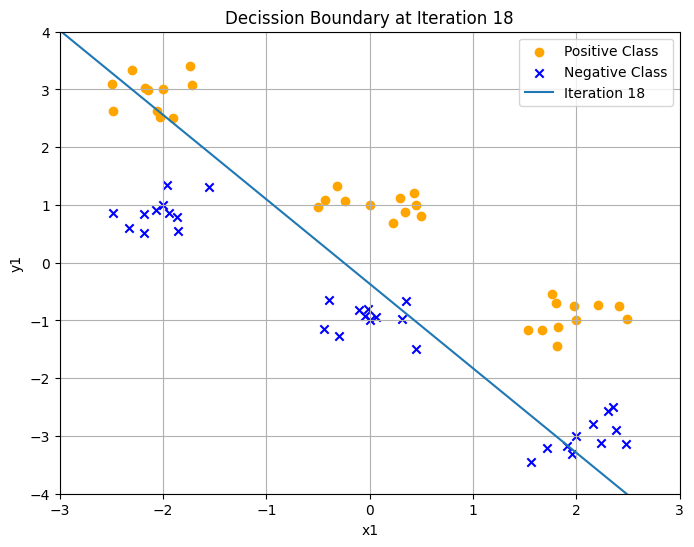

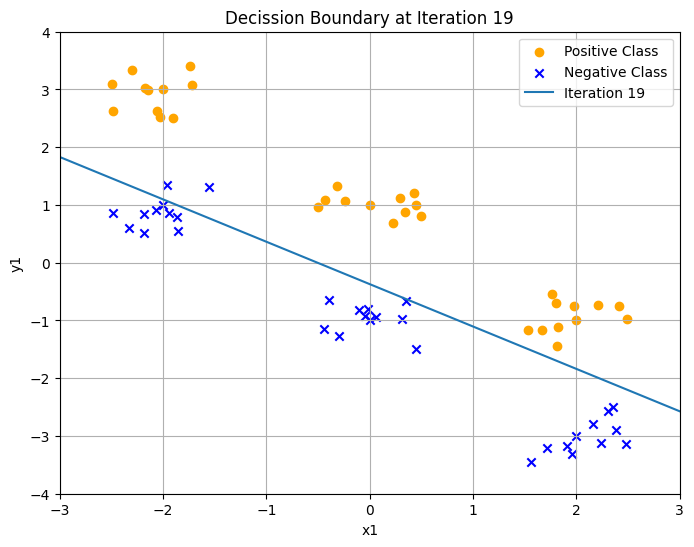

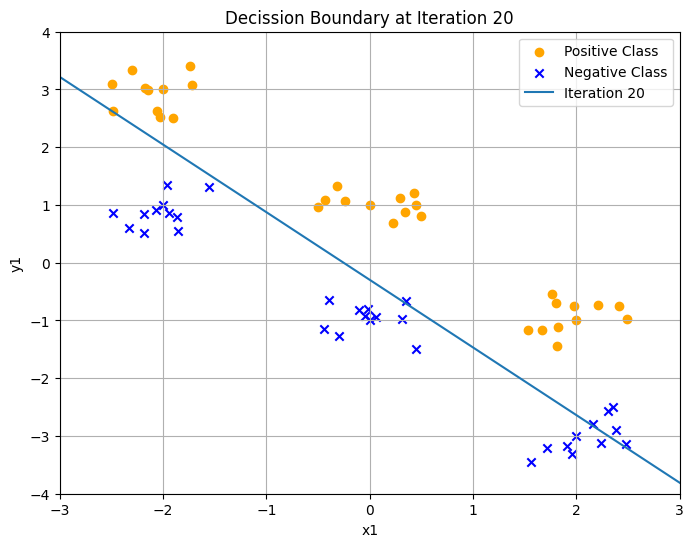

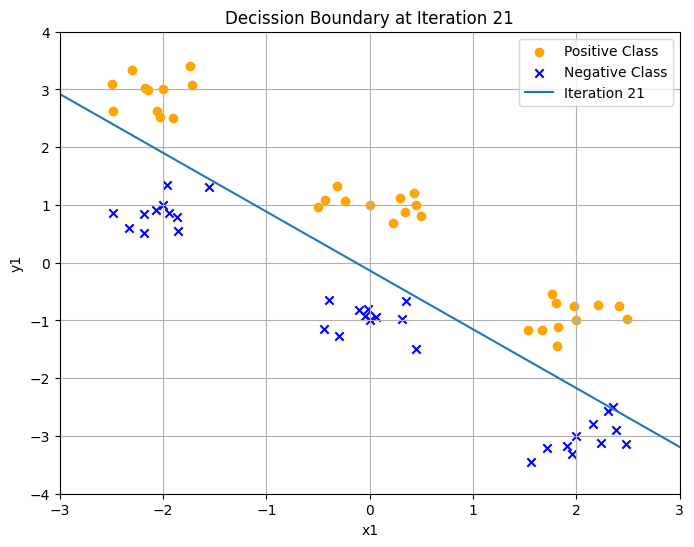

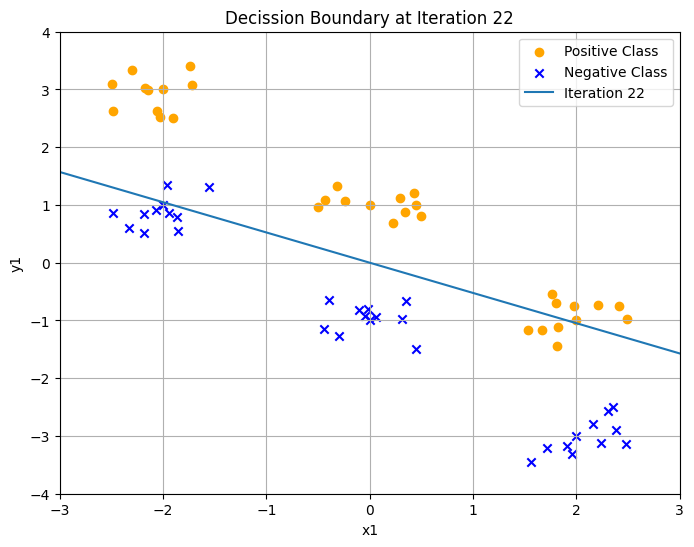

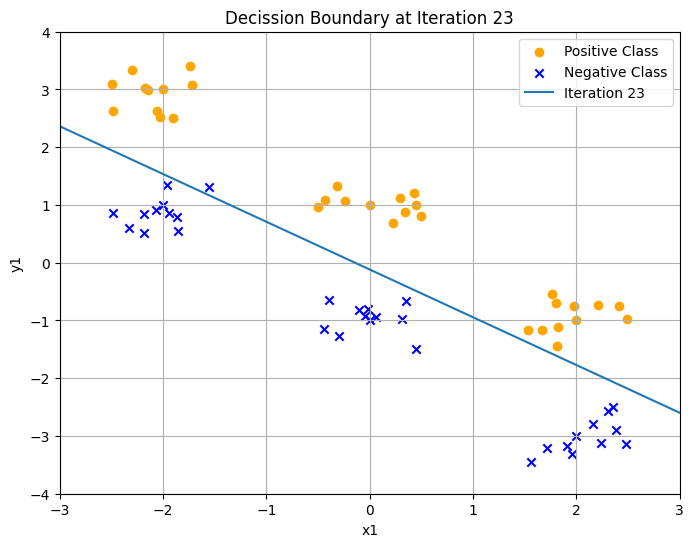

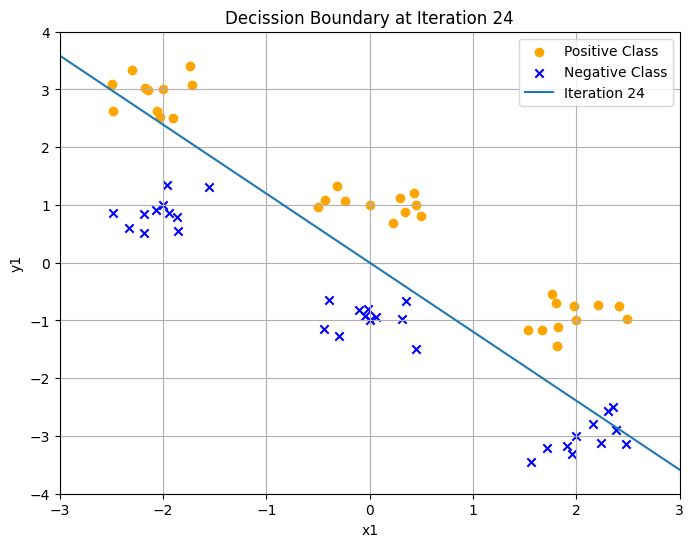

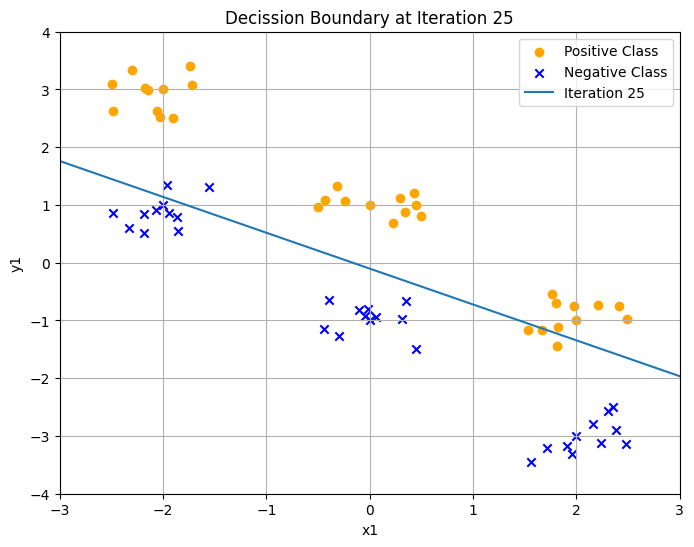

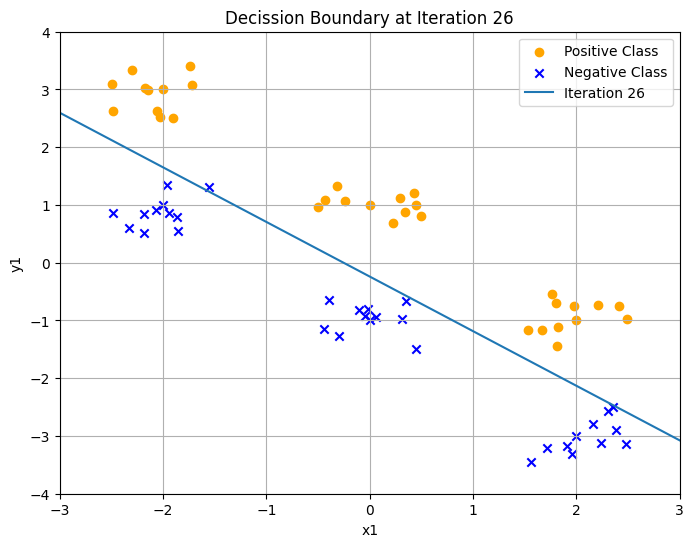

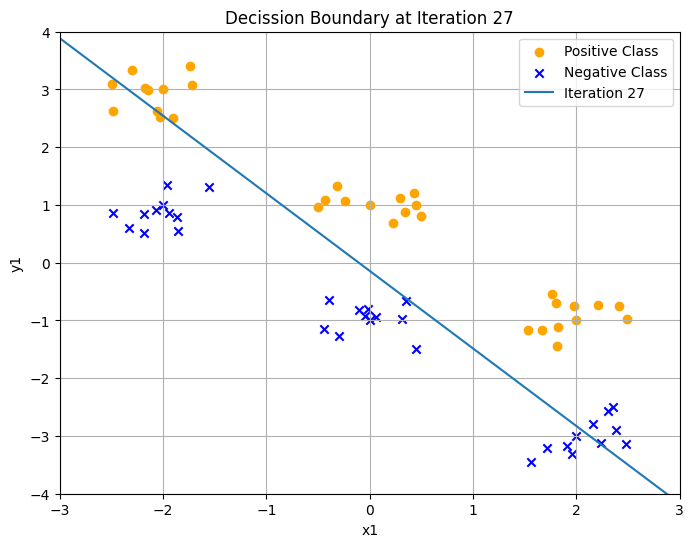

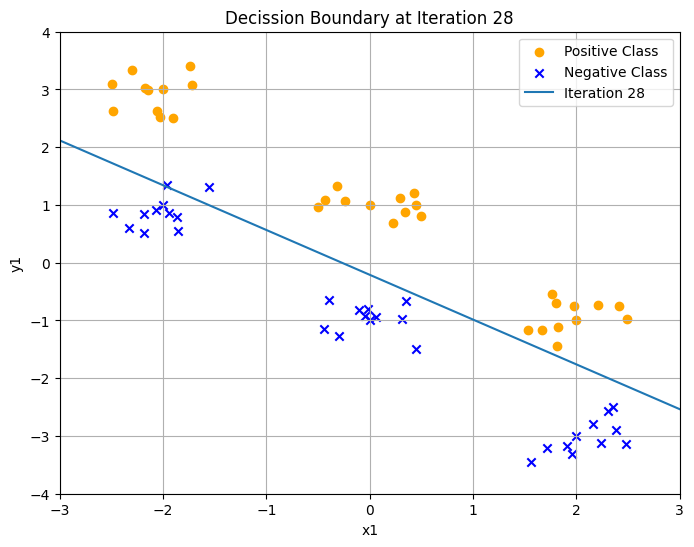

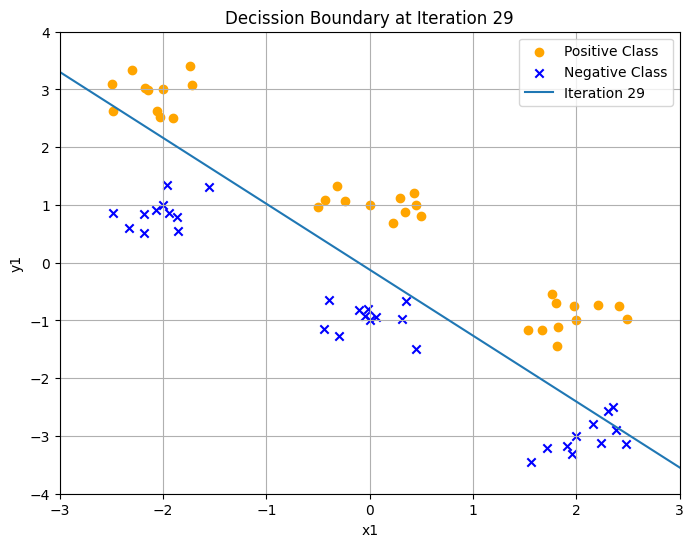

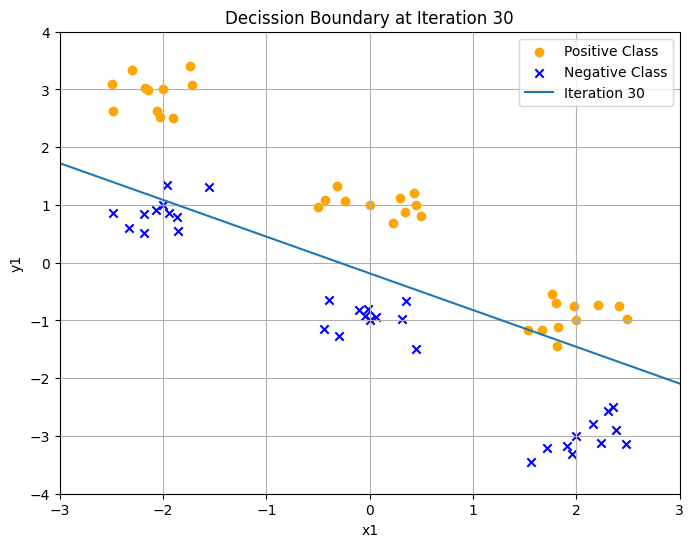

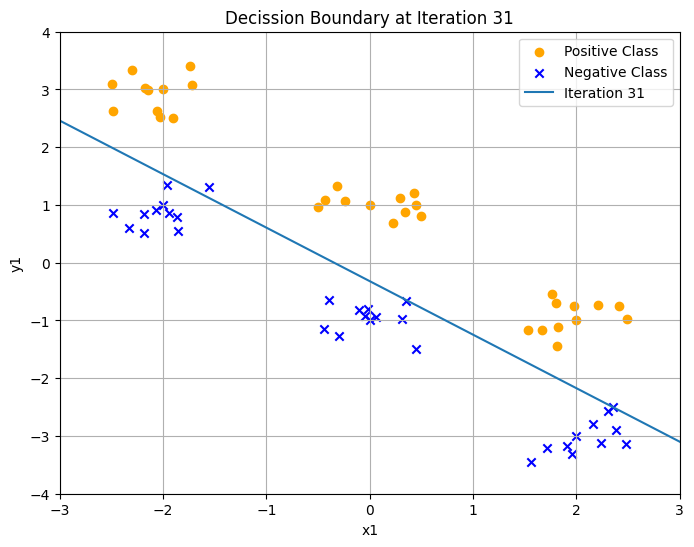

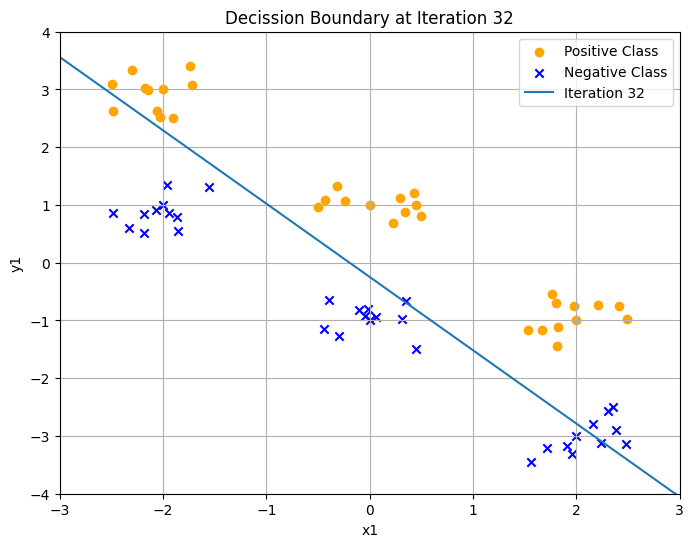

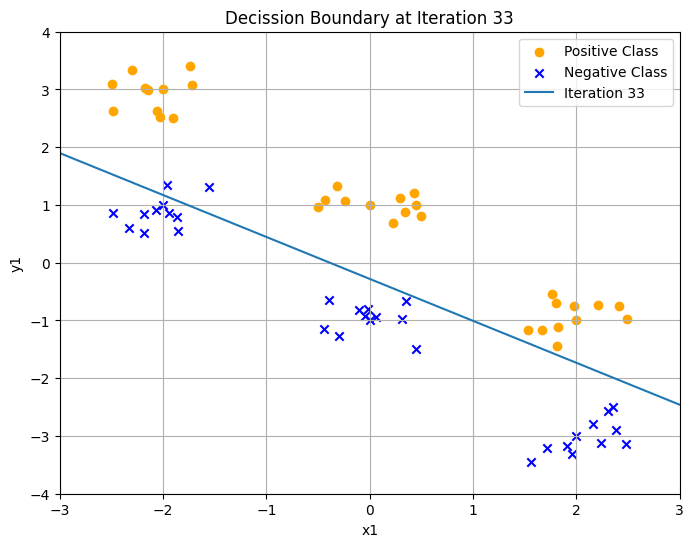

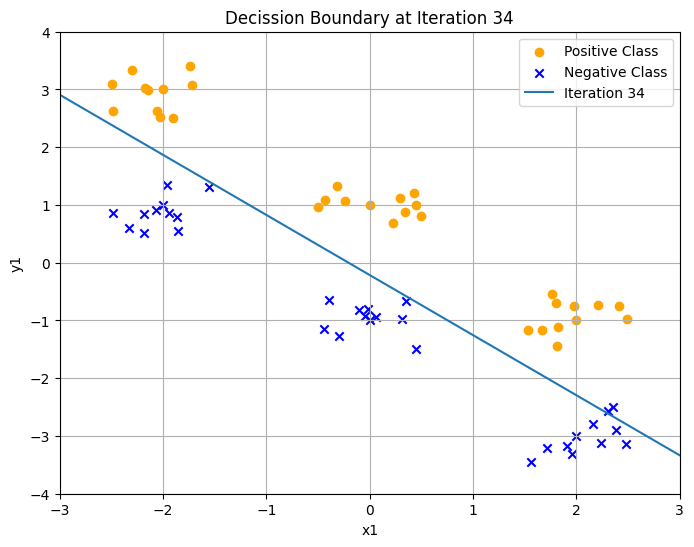

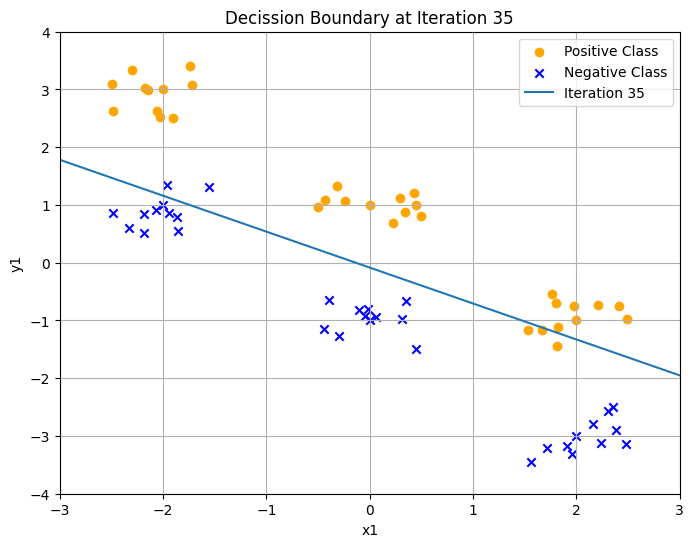

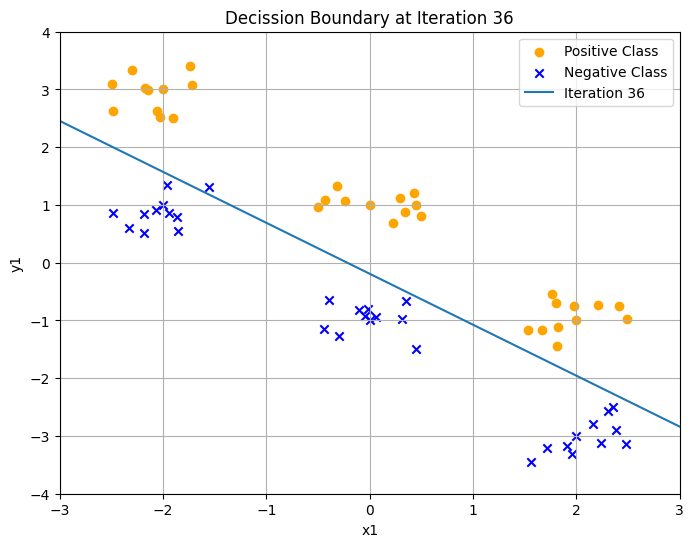

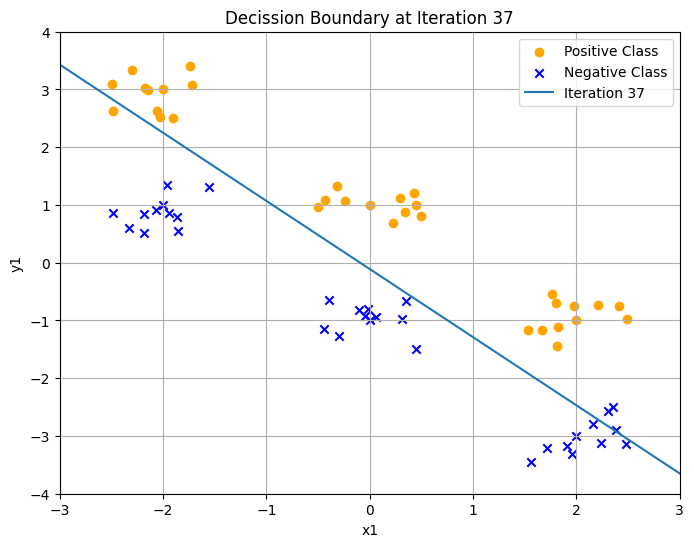

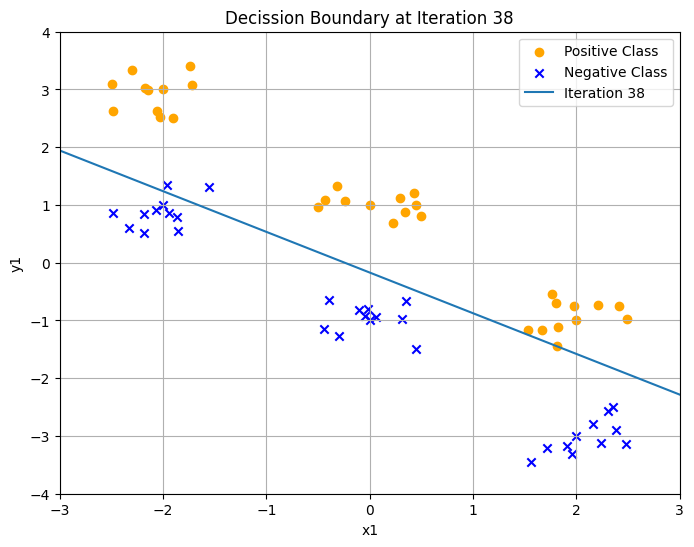

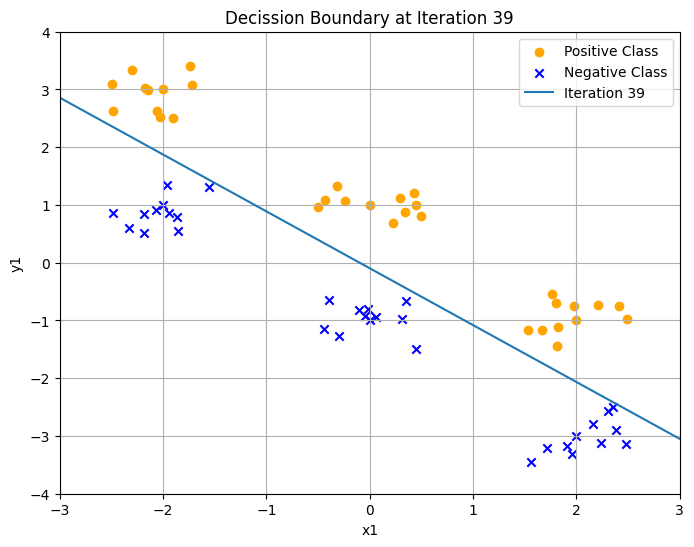

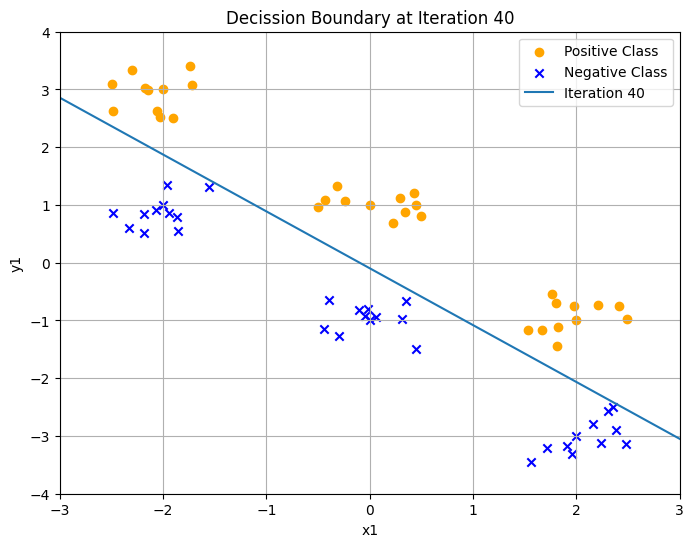

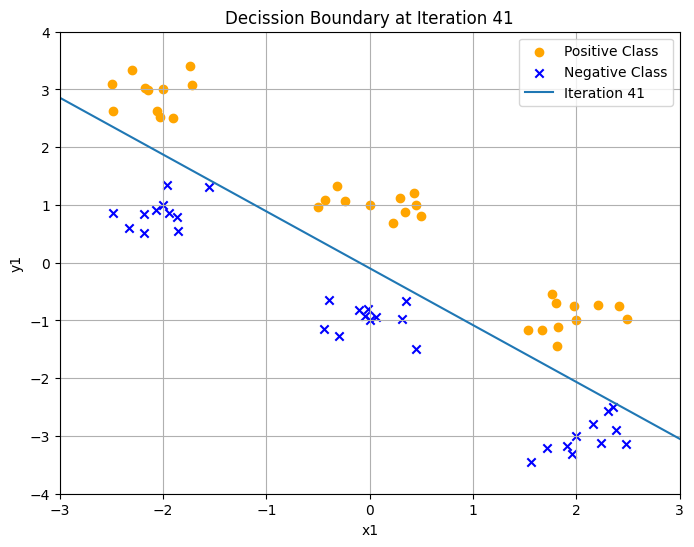

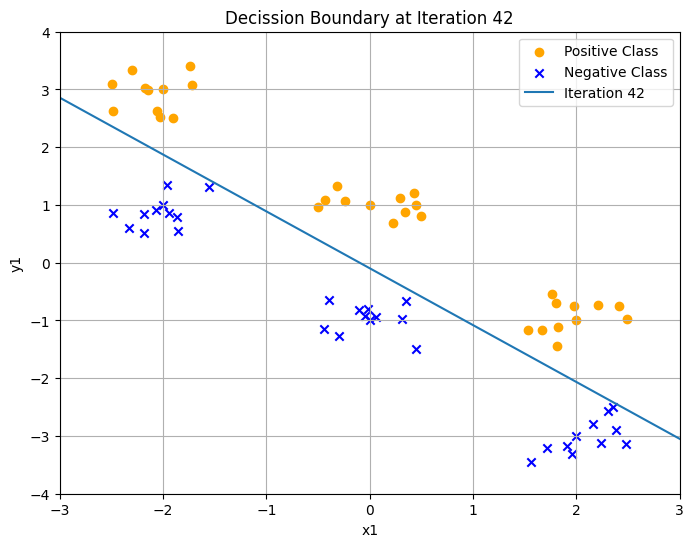

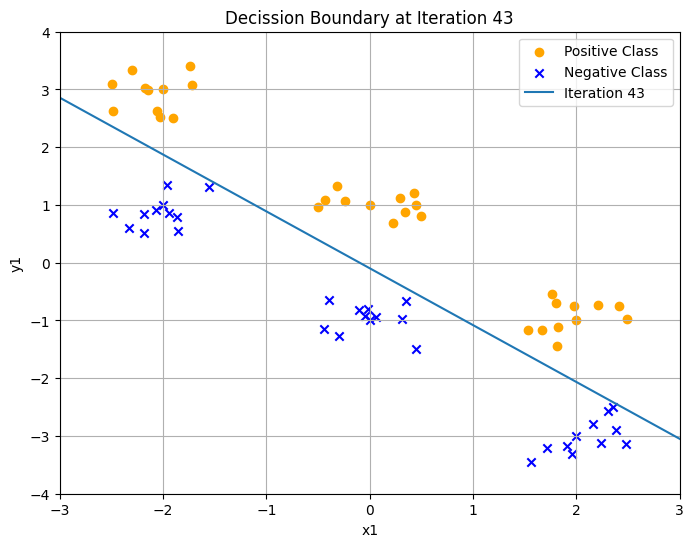

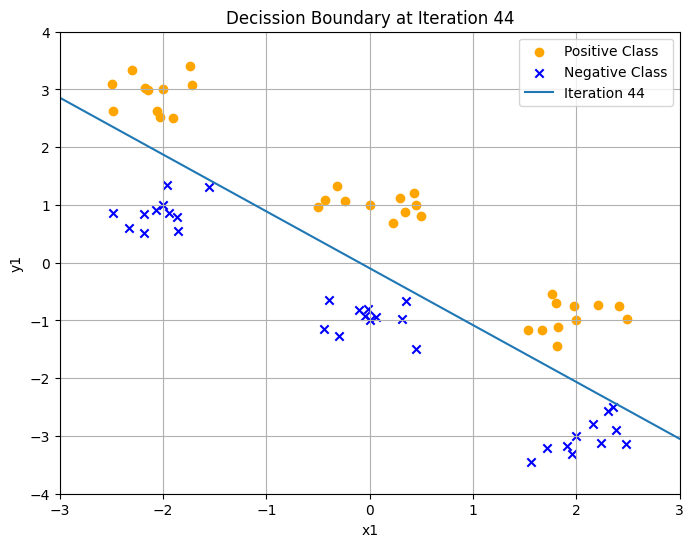

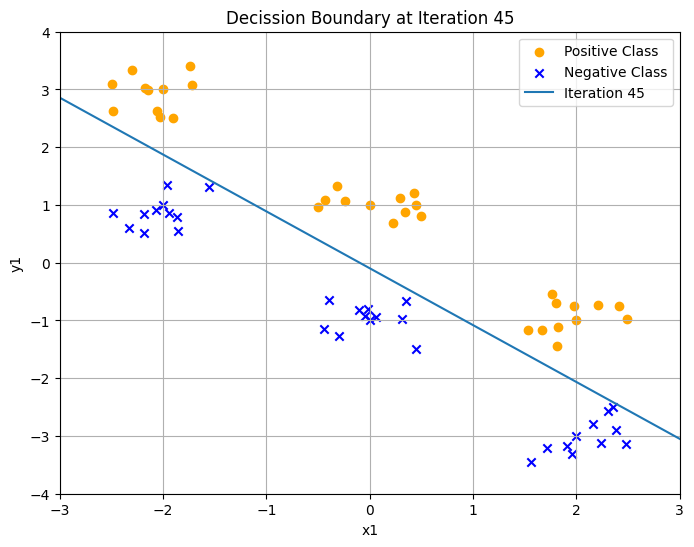

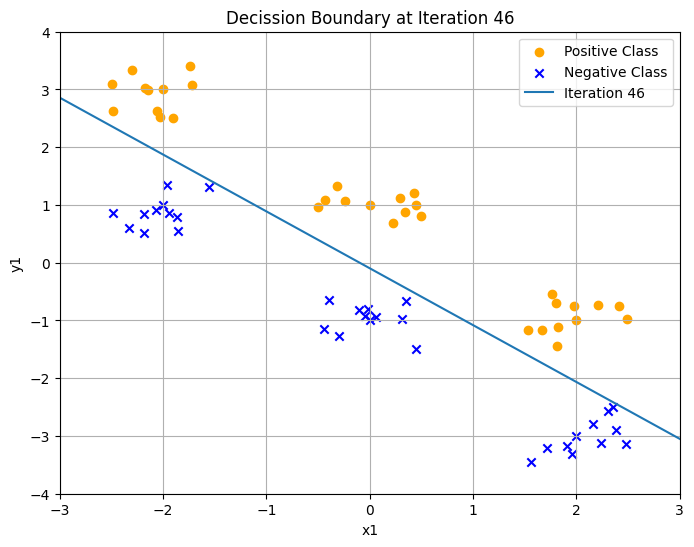

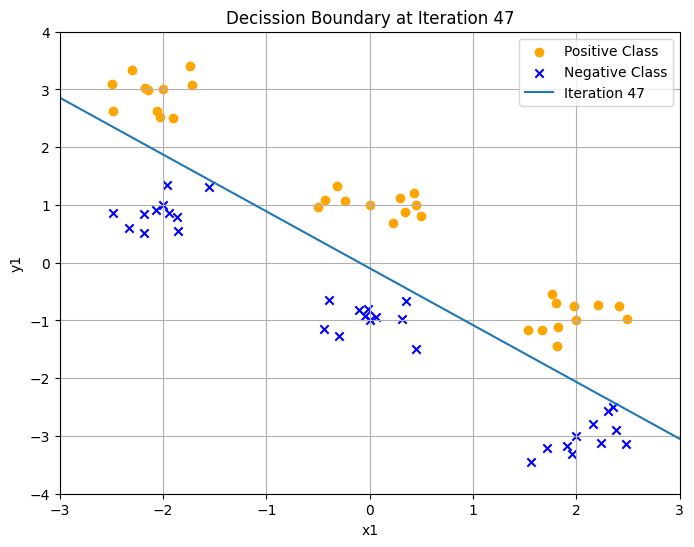

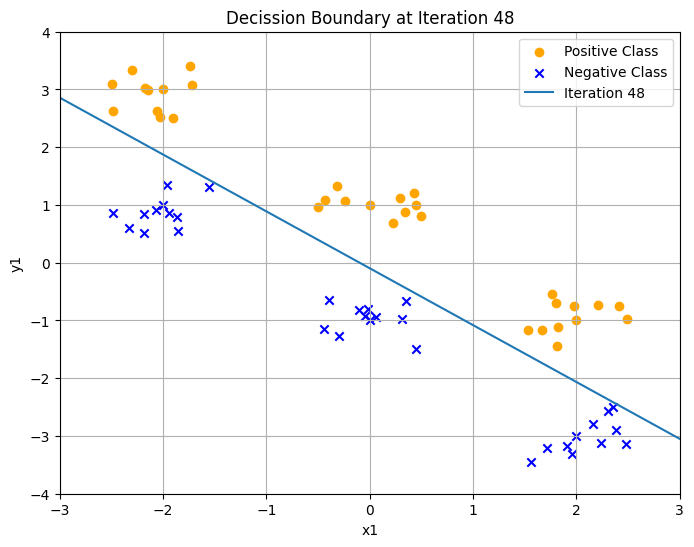

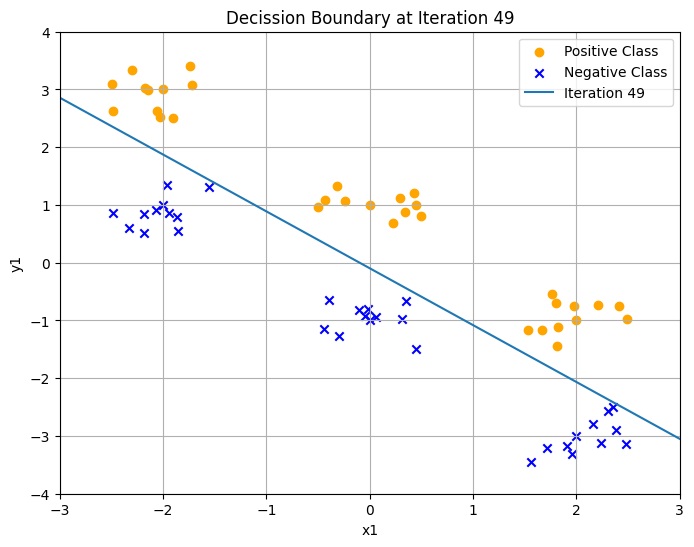

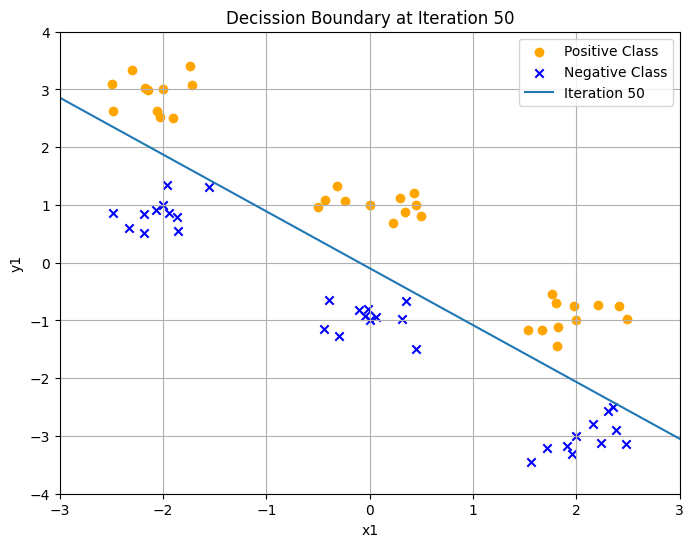

In [34]:
theta_final , theta0_final = perceptron(X,y,50)